In [20]:
# Feel free to add dependencies, but make sure that they are included in environment.yml

#disable some annoying warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

#plots the figures in place instead of a new window
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import altair as alt
from altair import datum
alt.data_transformers.disable_max_rows()

from sklearn import manifold
from openTSNE import TSNE
from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ParameterGrid
import seaborn as sns

<h1>Read excel file</h1>

In [4]:
# Install this to be able to use pd.read_excel
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


    opencv-python (>=3.) ; extra == 'all'
                  ~~~~^


In [5]:
# Load dataset
data = pd.read_excel('merged_games_with_scores.xlsx')

# Selecting only the board state columns for dimensionality reduction
board_state_columns = data.loc[:, 'aa':'ss']
player_info_columns = data[['game_id', 'move_id', 'color', 'our_players_color', 'winner_color', 'winner_score', 'result', 'rules', 'handicap', 'starter_player', 'step_count', 'level', 'Rank', 'Area score', 'Area score of opponent', 'Area_winner_color', 'Area result', 'Territory score', 'Territory score of opponent', 'Territory_winner_color', 'Territory result']]  


In [6]:
board_state_columns

,aa,ab,ac,ad,ae,af,ag,ah,ai,aj,...,sj,sk,sl,sm,sn,so,sp,sq,sr,ss
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5547,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5548,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5549,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5550,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
player_info_columns

,game_id,move_id,color,our_players_color,winner_color,winner_score,result,rules,handicap,starter_player,...,level,Rank,Area score,Area score of opponent,Area_winner_color,Area result,Territory score,Territory score of opponent,Territory_winner_color,Territory result
0,1,1,white,black,white,Time,score,Japanese,4,white,...,1,53,54.5,56.0,B,"1,5",4.5,3.0,W,"1,5"
1,1,2,black,black,white,Time,score,Japanese,4,white,...,1,53,54.5,56.0,B,"1,5",4.5,3.0,W,"1,5"
2,1,3,white,black,white,Time,score,Japanese,4,white,...,1,53,54.5,56.0,B,"1,5",4.5,3.0,W,"1,5"
3,1,4,black,black,white,Time,score,Japanese,4,white,...,1,53,54.5,56.0,B,"1,5",4.5,3.0,W,"1,5"
4,1,5,white,black,white,Time,score,Japanese,4,white,...,1,53,54.5,56.0,B,"1,5",4.5,3.0,W,"1,5"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5547,26,273,white,black,white,NaN,resign,Chinese,4,black,...,0,0,214.5,119.0,W,95.5,141.5,43.0,W,98.5
5548,26,274,black,black,white,NaN,resign,Chinese,4,black,...,0,0,214.5,119.0,W,95.5,141.5,43.0,W,98.5
5549,26,275,white,black,white,NaN,resign,Chinese,4,black,...,0,0,214.5,119.0,W,95.5,141.5,43.0,W,98.5
5550,26,276,black,black,white,NaN,resign,Chinese,4,black,...,0,0,214.5,119.0,W,95.5,141.5,43.0,W,98.5


<h1>PCA</h1>

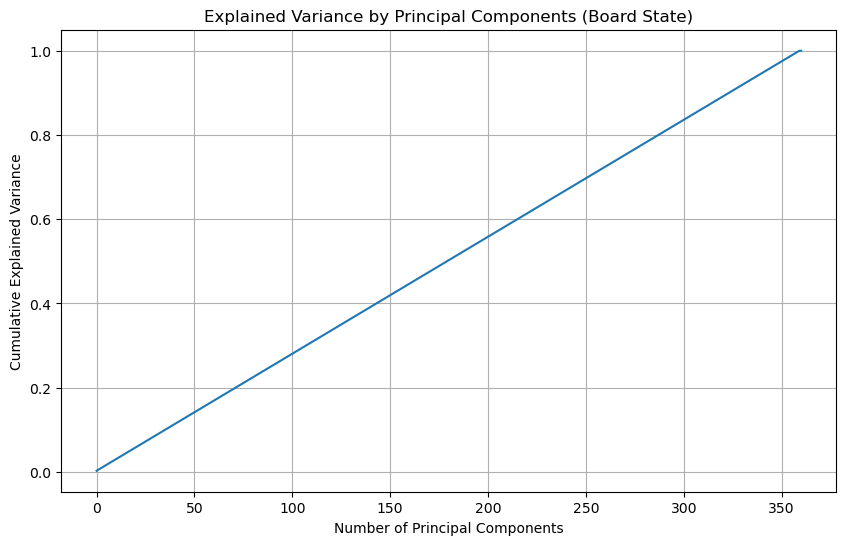

Explained variance by each component: [0.00278096 0.00278035 0.00278023 0.00278014 0.00278013 0.00278006
 0.00278    0.00277998 0.00277994 0.0027799  0.00277989 0.00277986
 0.00277965 0.00277964 0.00277958 0.00277957 0.00277952 0.00277952
 0.00277952 0.0027795  0.00277947 0.00277947 0.00277946 0.00277944
 0.00277944 0.00277943 0.0027794  0.00277932 0.00277931 0.00277924
 0.00277923 0.00277916 0.00277915 0.00277912 0.00277909 0.00277909
 0.00277908 0.00277904 0.00277904 0.00277904 0.00277903 0.00277901
 0.002779   0.00277899 0.00277896 0.00277891 0.00277883 0.00277883
 0.00277883 0.00277883 0.00277881 0.00277875 0.00277875 0.00277875
 0.00277873 0.00277867 0.00277867 0.00277867 0.00277867 0.00277867
 0.00277867 0.00277867 0.00277865 0.00277861 0.00277861 0.00277861
 0.00277861 0.00277861 0.00277861 0.00277859 0.00277857 0.00277856
 0.00277856 0.00277854 0.00277854 0.00277854 0.00277854 0.00277854
 0.00277852 0.00277852 0.00277847 0.00277842 0.00277842 0.0027784
 0.00277834 0.00277834 0.

In [11]:
# Standardize the board state data
scaler = StandardScaler()
board_state_scaled = scaler.fit_transform(board_state_columns)

# Apply PCA to the board state columns
pca = PCA()
board_state_pca = pca.fit_transform(board_state_scaled)

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components (Board State)')
plt.grid(True)
plt.show()

# Checking how many components explain a significant amount of variance
explained_variance = pca.explained_variance_ratio_

# Summary of PCA
print(f"Explained variance by each component: {explained_variance}")
print(f"Total explained variance: {np.cumsum(explained_variance)}")


<h5>It doesn't make any sense to use PCA on the board states, as no feature (in this case board position) seems to be more important than the others.</h5>

C:\Users\jpetr\AppData\Local\Temp\ipykernel_17852\1113026224.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_info_columns[feature] = pd.to_numeric(player_info_columns[feature], errors='coerce')
C:\Users\jpetr\AppData\Local\Temp\ipykernel_17852\1113026224.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_info_columns[numerical_features] = player_info_columns[numerical_features].fillna(



Most important features for each principal component:

Principal Component 1:
  Area score of opponent: 0.4870
  Territory score: -0.4364
  Area score: -0.4346
  Territory score of opponent: 0.4316
  step_count: 0.2640
  handicap: 0.1861
  level_3: -0.1269
  winner_color_black: 0.1145
  winner_color_white: -0.1145
  level_2: 0.0812

Principal Component 2:
  step_count: 0.5522
  handicap: -0.3873
  Area score: 0.3263
  Area score of opponent: 0.2670
  Area_winner_color_B: -0.1932
  Area_winner_color_W: 0.1932
  result_score: 0.1907
  result_resign: -0.1907
  Territory_winner_color_B: -0.1644
  Territory_winner_color_W: 0.1644

Principal Component 3:
  handicap: 0.6210
  Territory score: 0.3726
  Area score: 0.3178
  starter_player_black: -0.2825
  starter_player_white: 0.2825
  Territory score of opponent: 0.2522
  Area score of opponent: 0.1468
  step_count: 0.1365
  winner_color_white: 0.1208
  winner_color_black: -0.1208

Principal Component 4:
  Territory score of opponent: 0.3944


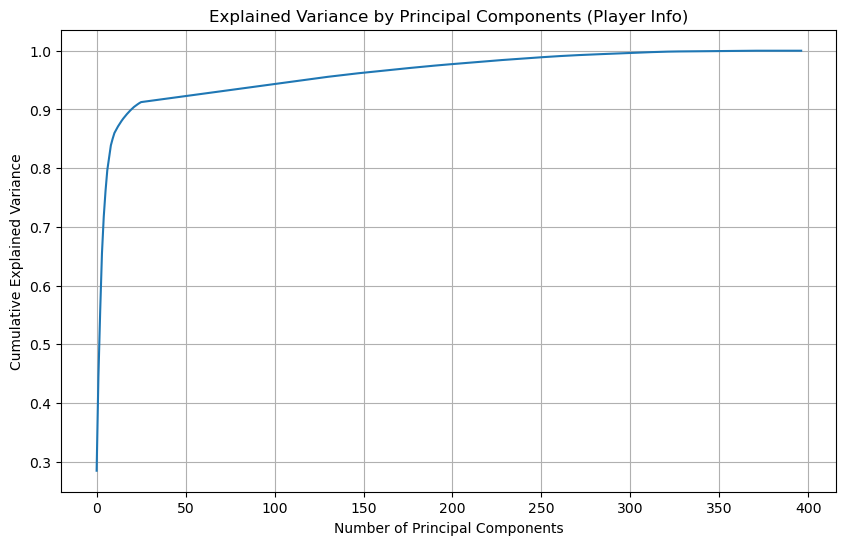

In [16]:
# !!!! winner_score and Rank are excluded here!!!!
numerical_features = ['handicap', 'step_count', 
                      'Area score', 'Area score of opponent', 'Area result', 'Territory score', 
                      'Territory score of opponent', 'Territory result']
categorical_features = ['game_id', 'move_id', 'color', 'our_players_color', 
                        'winner_color', 'result', 'rules', 'starter_player', 
                        'level', 'Area_winner_color', 'Territory_winner_color']

# Converting numerical features to numeric (int/float)
for feature in numerical_features:
    player_info_columns[feature] = pd.to_numeric(player_info_columns[feature], errors='coerce')

# Handling any NaN values that result from conversion
# For example, filling NaN values with the mean of the column
player_info_columns[numerical_features] = player_info_columns[numerical_features].fillna(
    player_info_columns[numerical_features].mean()
)

# Preprocessing: One-Hot Encoding for categorical features and Standardization for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Create a pipeline for PCA
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA())
])

# Apply PCA to the player info columns
player_info_pca = pipeline.fit_transform(player_info_columns)

# Extract PCA component and explained variance
pca = pipeline.named_steps['pca']
explained_variance = pca.explained_variance_ratio_

# Get feature names from the preprocessor
# Note: OneHotEncoder generates multiple columns for each category, so we need to extract all feature names
onehot_feature_names = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = numerical_features + list(onehot_feature_names)

# Analyze the PCA components to see the most important features
pca_components = pca.components_

# Print out the most important features for each principal component
print("\nMost important features for each principal component:\n")
for i, component in enumerate(pca_components):
    # Get the top features for this component, sorted by the absolute value of their loadings
    important_features = sorted(zip(all_feature_names, component), key=lambda x: abs(x[1]), reverse=True)
    print(f"Principal Component {i + 1}:")
    for feature, loading in important_features[:10]:  # Print top 10 features for each component
        print(f"  {feature}: {loading:.4f}")
    print()

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components (Player Info)')
plt.grid(True)
plt.show()

<h4>PC 1 - focuses on overall scoring metrics</h4>
The score-related features (Area score, Territory score, and their opponent counterparts) seem highly important. --> they affect game outcomes or player performance most significantly (of course :D )

<h4>PC 2 - focuses on progression of the game</h4>
!!!!! The step_count and handicap features are crucial here. Consider analyzing how the length of the game and the handicap setting influence the strategies and scores of players.

<h4>PC 3 - focuses on the initial game conditions</h4>
!!!!!Handicap and the identity of the starter_player (black or white) are important features to analyze. Investigate how initial conditions and starting player influence the final scores and outcomes.

<h4>PC 4 - focuses on territorial aspects of the game</h4>
!!!!!Analyzing territory-based strategies and how they interact with initial game conditions (like handicap) could provide deeper insights into player performance.

<h4>PC 5 - focuses on game progression and duration</h4>
!!!!!Investigating how game duration affects strategic decisions and whether certain player levels or ranks are associated with longer, more strategically complex games could yield interesting findings.

<h1>t-SNE</h1>

In [33]:
# print preprocessor
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['handicap', 'step_count', 'Area score',
                                  'Area score of opponent', 'Area result',
                                  'Territory score',
                                  'Territory score of opponent',
                                  'Territory result']),
                                ('cat', OneHotEncoder(),
                                 ['game_id', 'move_id', 'color',
                                  'our_players_color', 'winner_color', 'result',
                                  'rules', 'starter_player', 'level',
                                  'Area_winner_color',
                                  'Territory_winner_color'])])

In [35]:
# print to check how it looks
player_info_columns

,game_id,move_id,color,our_players_color,winner_color,winner_score,result,rules,handicap,starter_player,...,level,Rank,Area score,Area score of opponent,Area_winner_color,Area result,Territory score,Territory score of opponent,Territory_winner_color,Territory result
0,1,1,white,black,white,Time,score,Japanese,4,white,...,1,53,54.5,56.0,B,95.5,4.5,3.0,W,98.5
1,1,2,black,black,white,Time,score,Japanese,4,white,...,1,53,54.5,56.0,B,95.5,4.5,3.0,W,98.5
2,1,3,white,black,white,Time,score,Japanese,4,white,...,1,53,54.5,56.0,B,95.5,4.5,3.0,W,98.5
3,1,4,black,black,white,Time,score,Japanese,4,white,...,1,53,54.5,56.0,B,95.5,4.5,3.0,W,98.5
4,1,5,white,black,white,Time,score,Japanese,4,white,...,1,53,54.5,56.0,B,95.5,4.5,3.0,W,98.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5547,26,273,white,black,white,NaN,resign,Chinese,4,black,...,0,0,214.5,119.0,W,95.5,141.5,43.0,W,98.5
5548,26,274,black,black,white,NaN,resign,Chinese,4,black,...,0,0,214.5,119.0,W,95.5,141.5,43.0,W,98.5
5549,26,275,white,black,white,NaN,resign,Chinese,4,black,...,0,0,214.5,119.0,W,95.5,141.5,43.0,W,98.5
5550,26,276,black,black,white,NaN,resign,Chinese,4,black,...,0,0,214.5,119.0,W,95.5,141.5,43.0,W,98.5


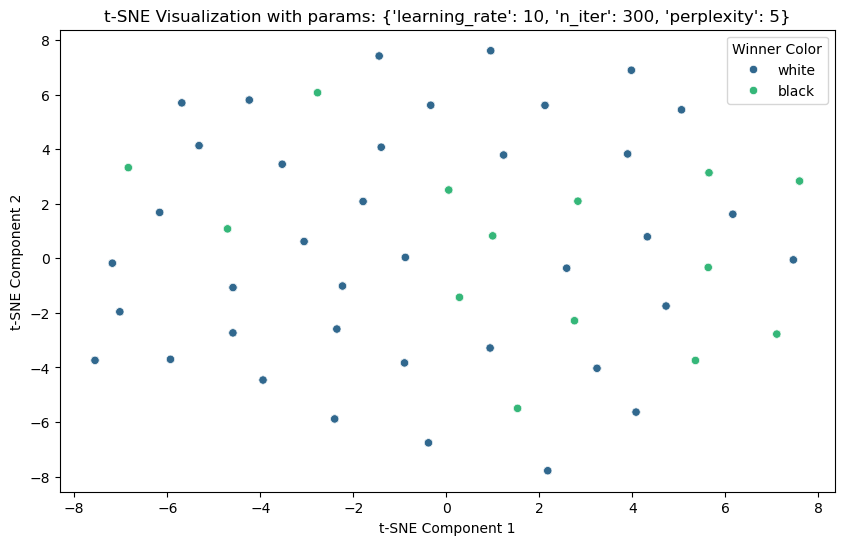

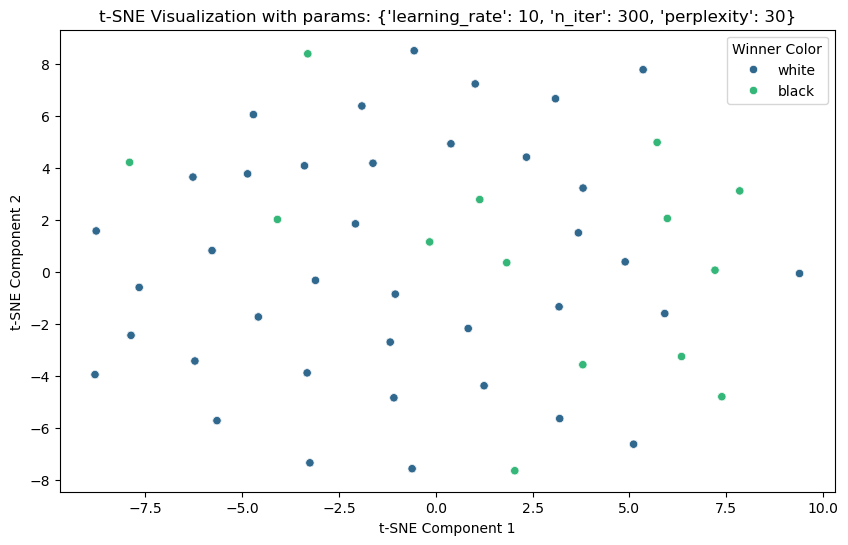

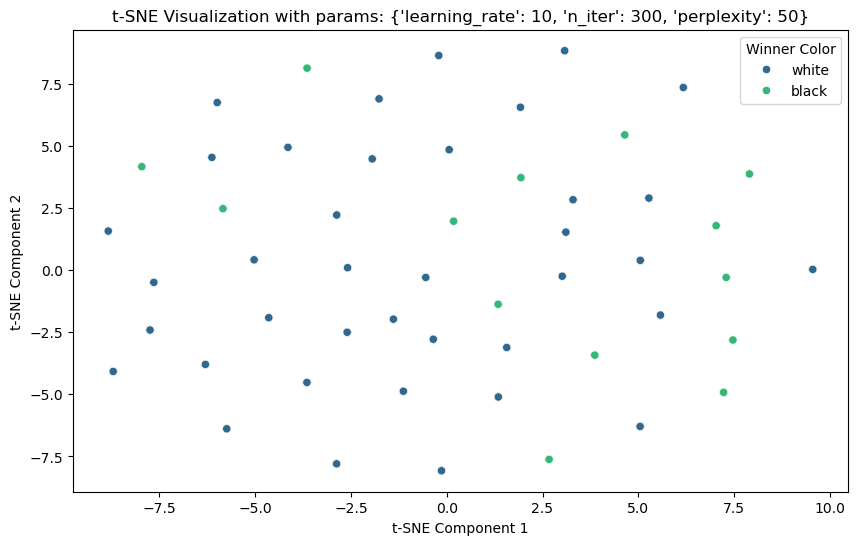

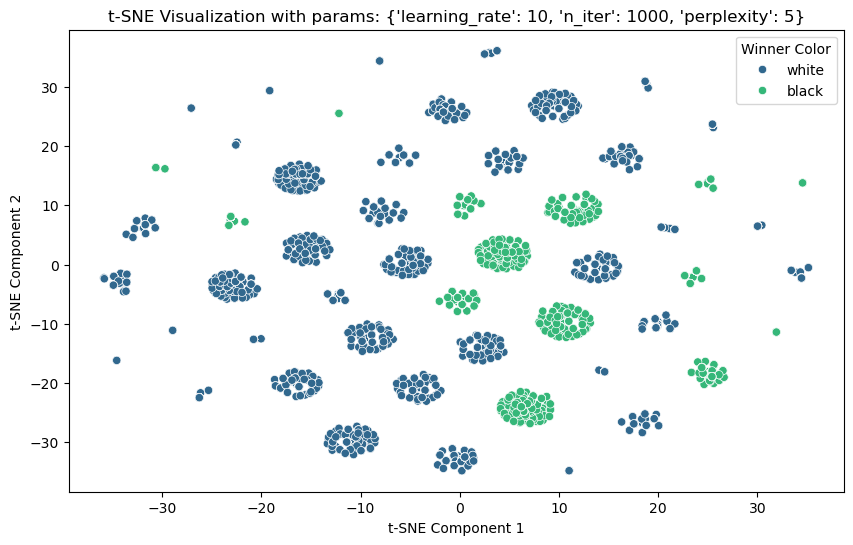

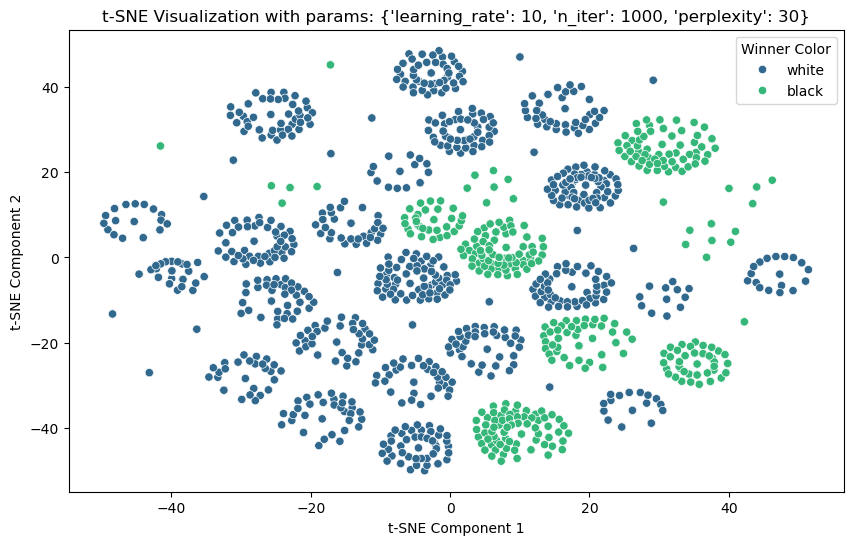

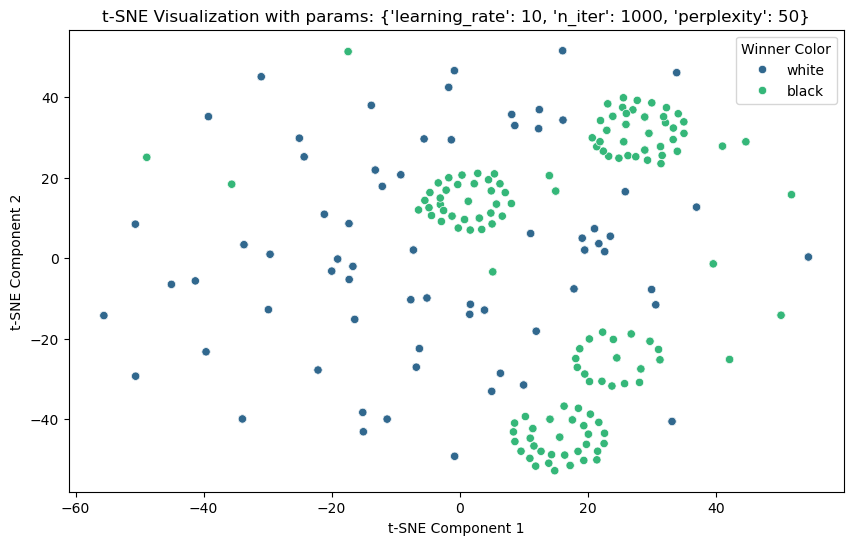

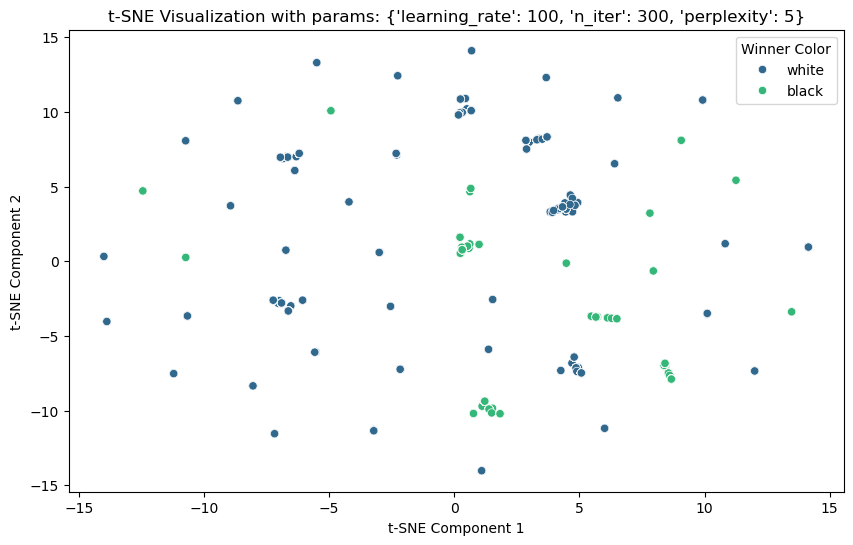

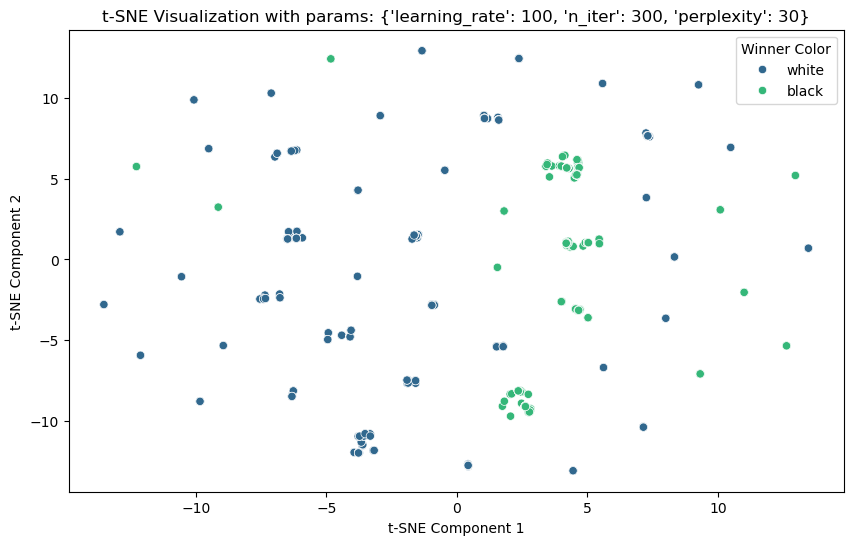

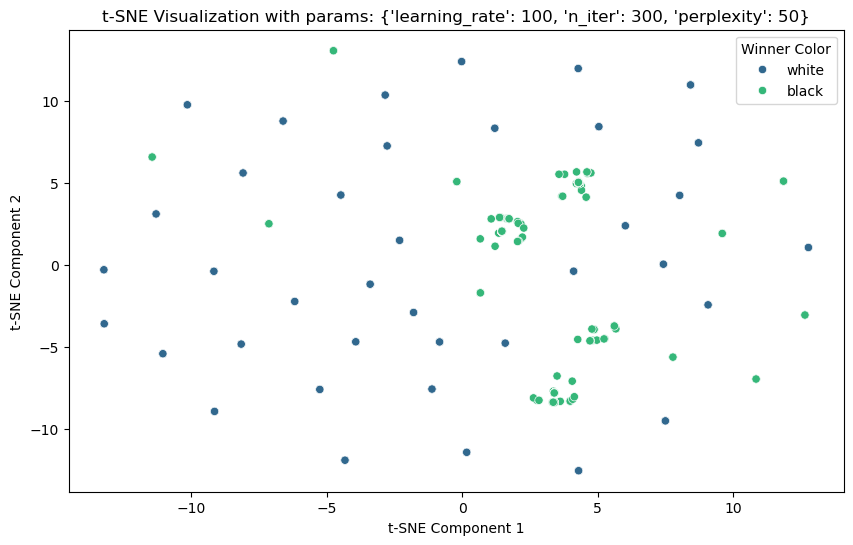

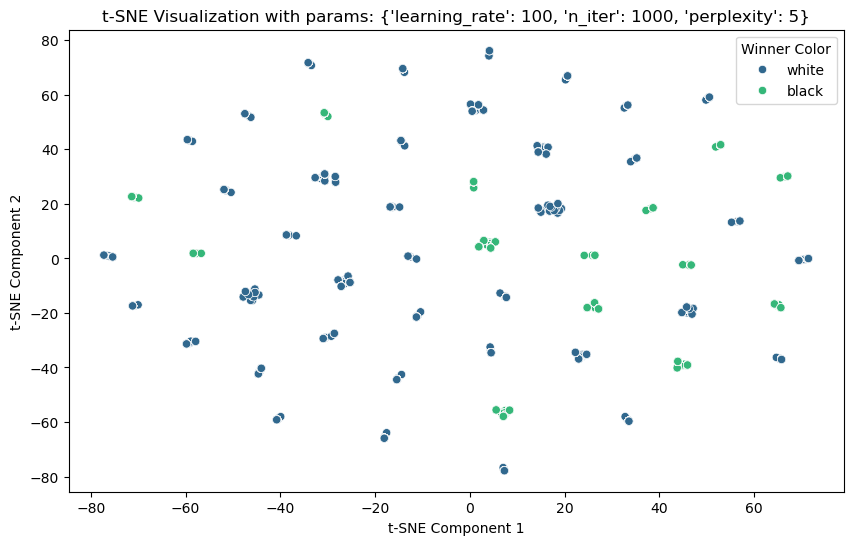

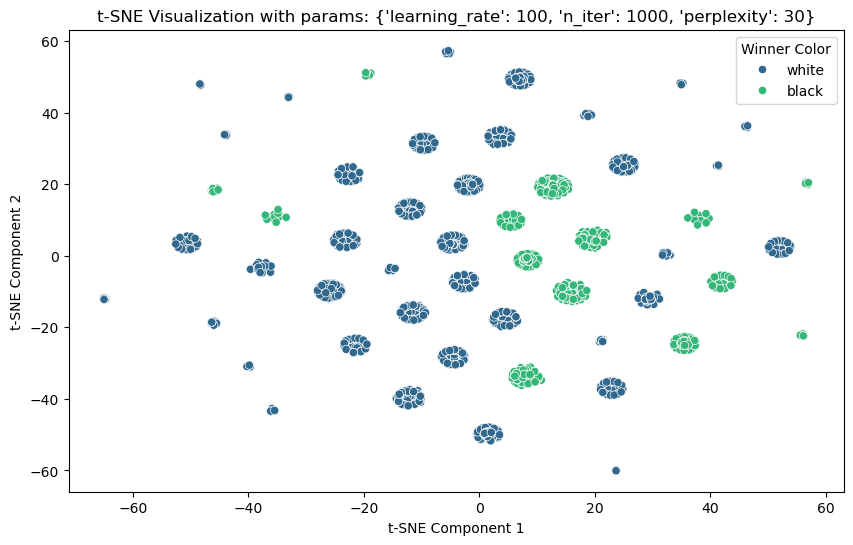

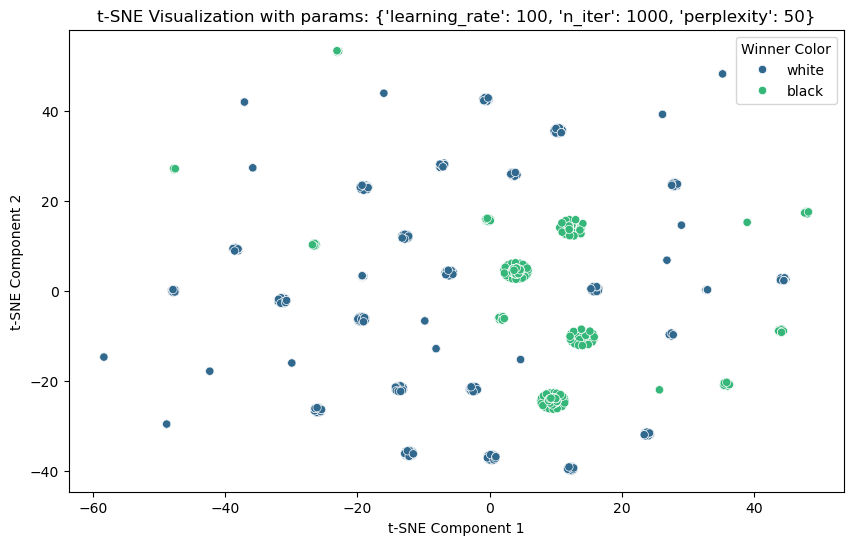

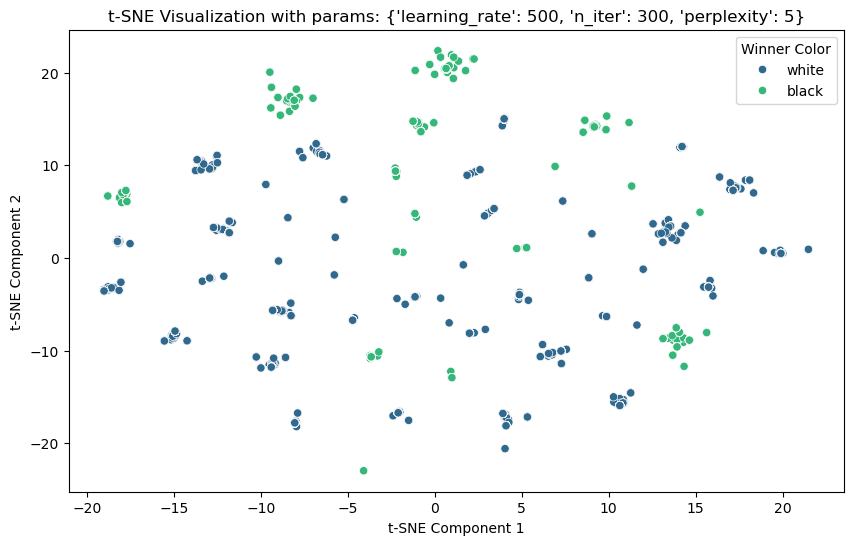

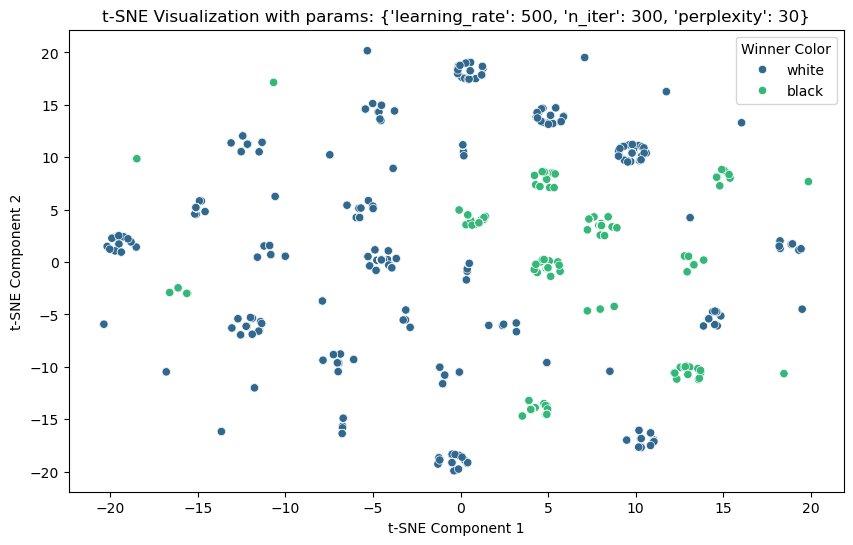

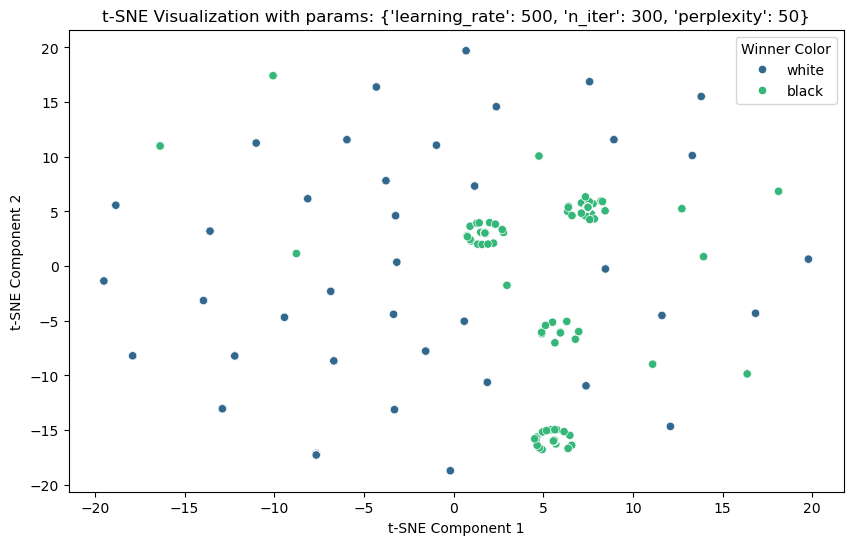

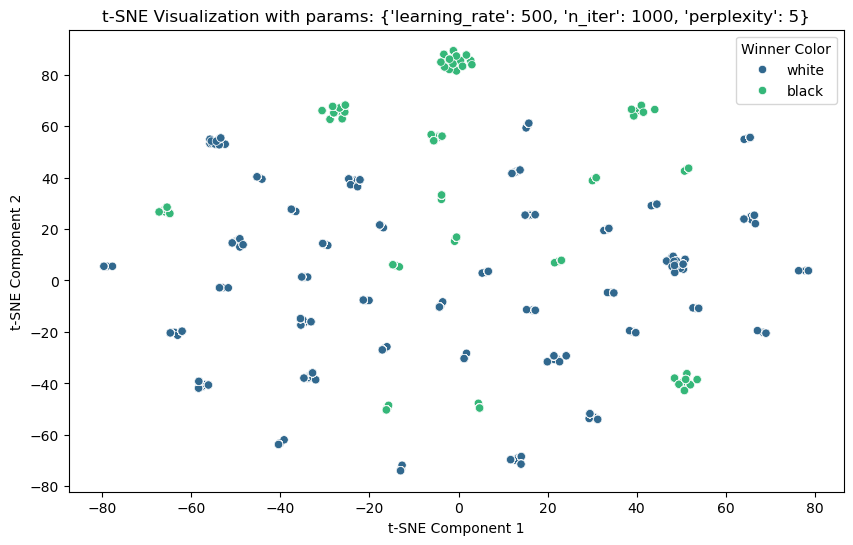

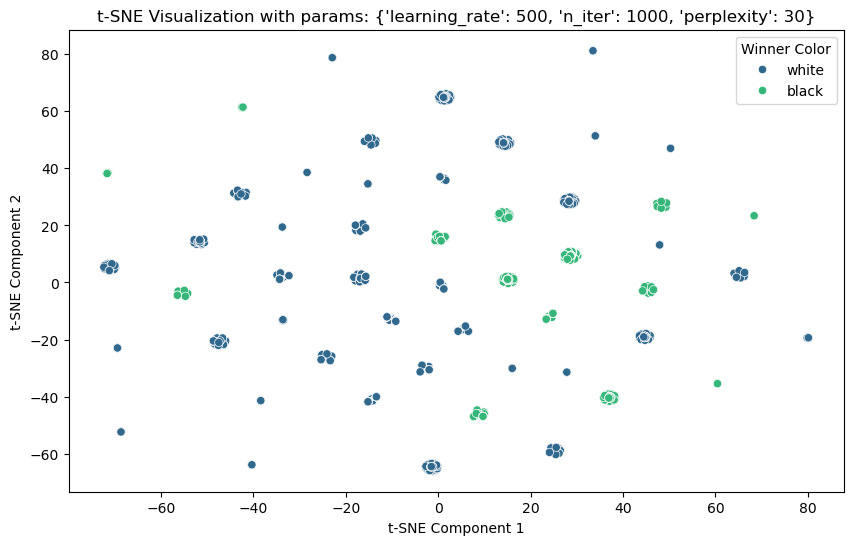

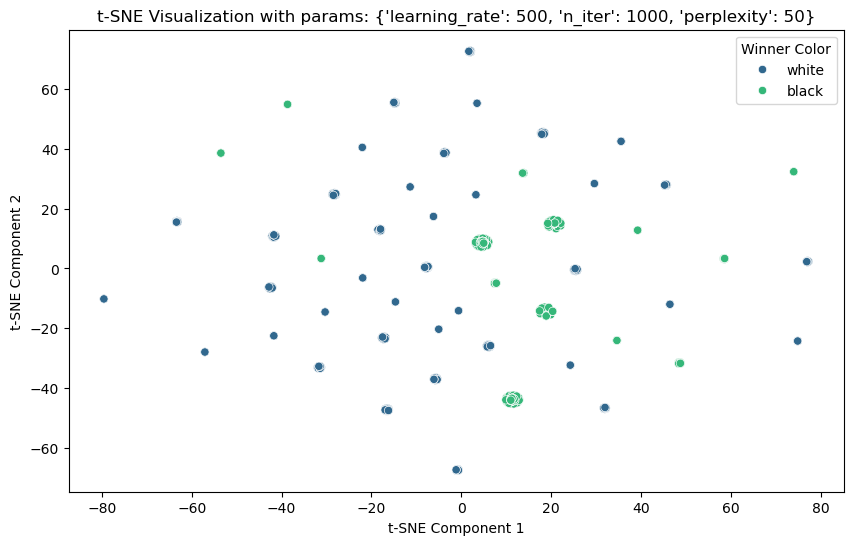

Best t-SNE Parameters: {'learning_rate': 10, 'n_iter': 1000, 'perplexity': 50}
Lowest KL Divergence: -2.3387043476104736


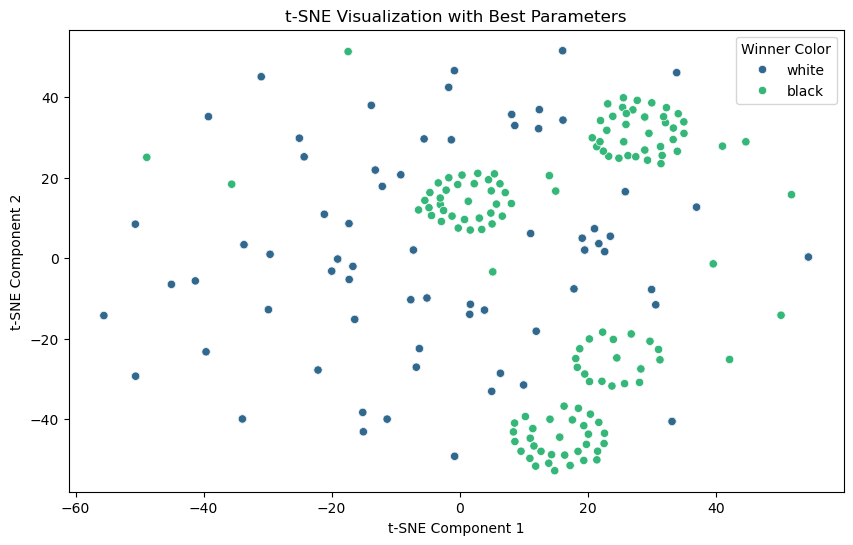

In [25]:
# Apply transformations and convert to a dense matrix
X = preprocessor.fit_transform(player_info_columns).toarray()

# Set up parameter grid for t-SNE
# perplexity: lower perplexity focuses on local structure, while a higher perplexity considers more global relationships.
# learning_rate: This parameter controls the step size during optimization. A suitable learning rate helps the algorithm converge efficiently.
# n_iter: This parameter defines the number of iterations for the optimization algorithm.
# init: This parameter determines how to initialize the low-dimensional embedding.
# metric (not used by us): This parameter specifies the distance metric used to compute pairwise distances between points in the high-dimensional space. Options include 'euclidean', 'cosine', and others
param_grid = {
    'perplexity': [5, 30, 50],  # Typical values are between 5 and 50
    'learning_rate': [10, 100, 500],  # Values between 10 and 1000 can be experimented with
    'n_iter': [300, 1000]  # Number of iterations
}

# Perform grid search
best_params = None
lowest_kl_divergence = float('inf')
X_embedded = None

for params in ParameterGrid(param_grid):
    tsne = TSNE(
        n_components=2,
        perplexity=params['perplexity'],
        learning_rate=params['learning_rate'],
        n_iter=params['n_iter'],
        init='random',  # Use "random" initialization to avoid the sparse matrix issue
        random_state=42
    )
    X_tsne = tsne.fit_transform(X)

    #############
    # Plotting the t-SNE result
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=data['winner_color'], palette='viridis')
    plt.title(f't-SNE Visualization with params: {params}')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.legend(title='Winner Color')
    plt.show()
    ############
    
    # Calculate a metric like KL divergence (inertia, etc.)
    kl_divergence = tsne.kl_divergence_  # Only available in scikit-learn 0.24 or higher
    
    if kl_divergence < lowest_kl_divergence:
        lowest_kl_divergence = kl_divergence
        best_params = params
        X_embedded = X_tsne

# Print best parameters
print("Best t-SNE Parameters:", best_params)
print("Lowest KL Divergence:", lowest_kl_divergence)

# Plotting the t-SNE result with the best params according to the grid search
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=data['winner_color'], palette='viridis')
plt.title('t-SNE Visualization with Best Parameters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Winner Color')
plt.show()

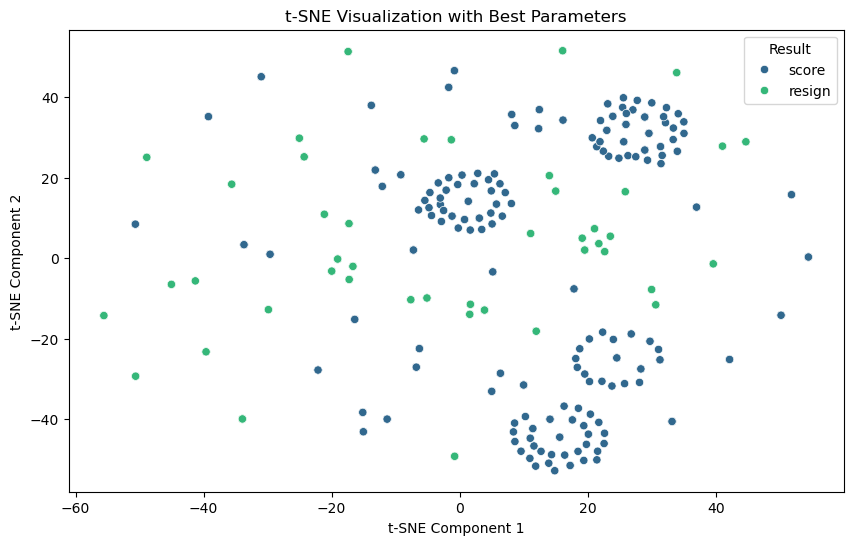

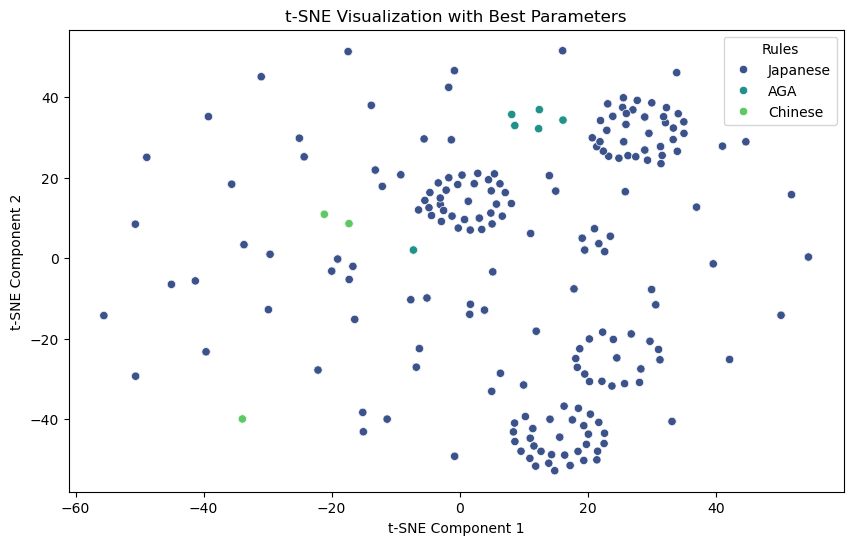

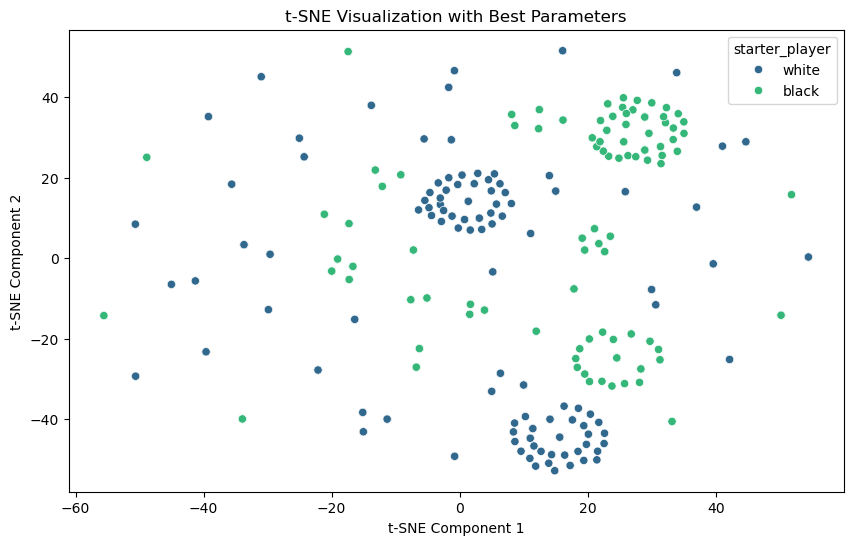

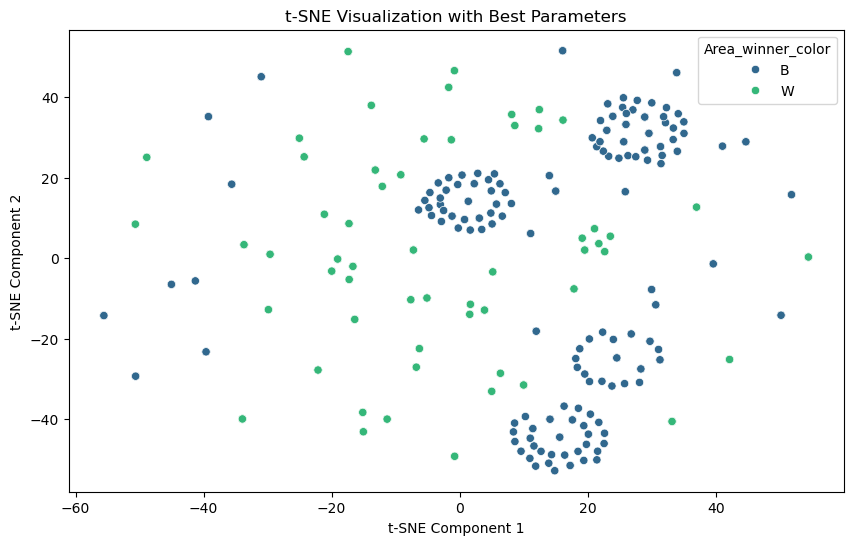

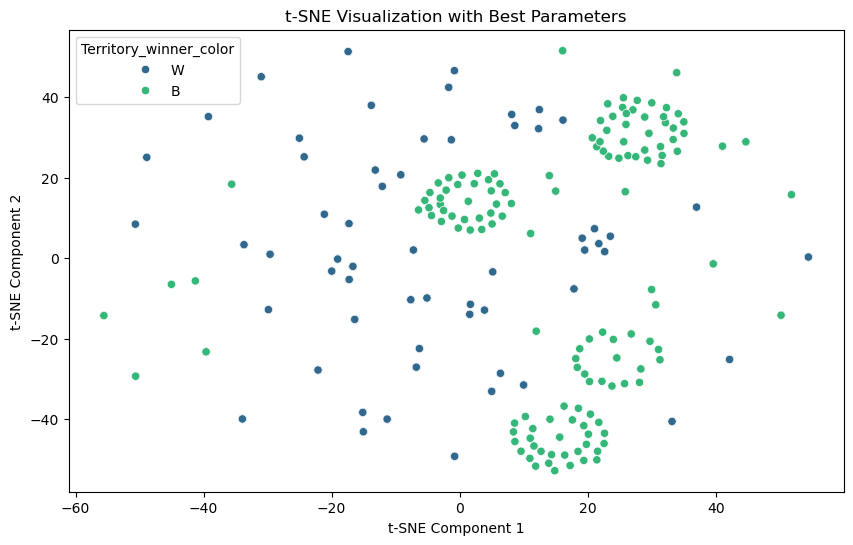

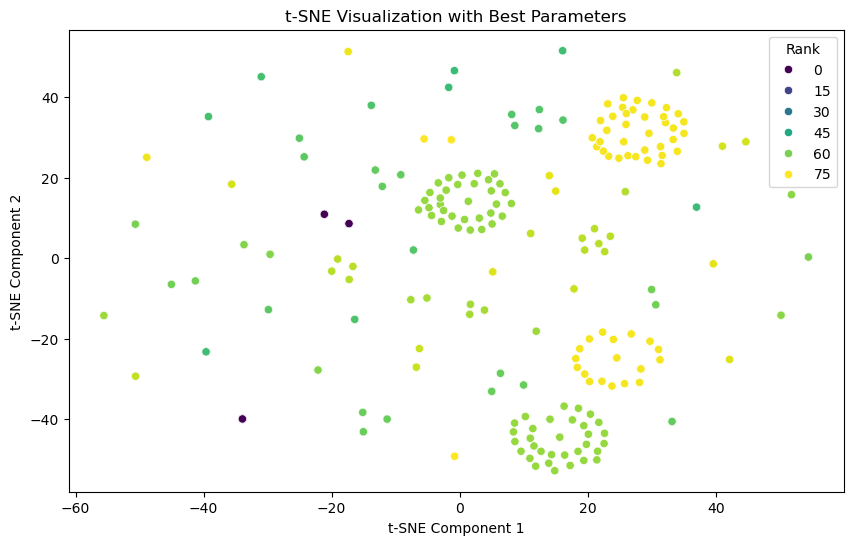

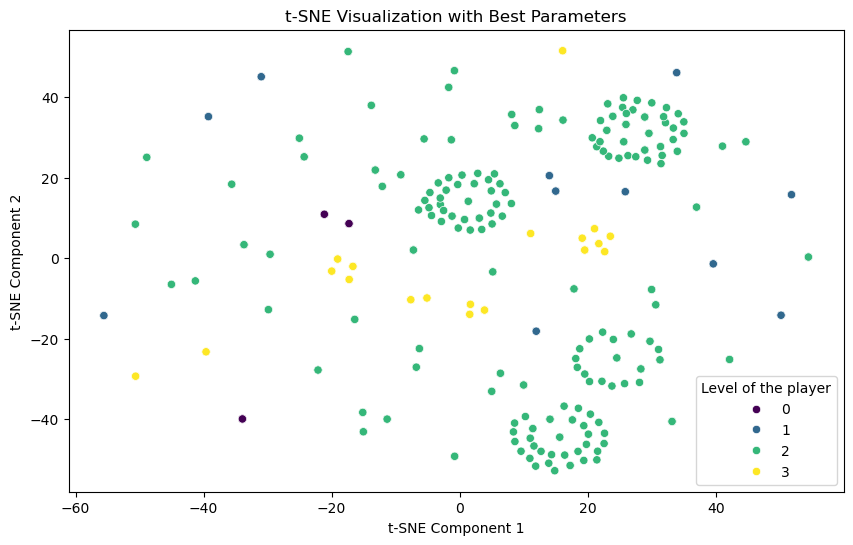

In [29]:
# Experiment with different hues

# Result
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=data['result'], palette='viridis')
plt.title('t-SNE Visualization with Best Parameters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Result')
plt.show()

# Rules
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=data['rules'], palette='viridis')
plt.title('t-SNE Visualization with Best Parameters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Rules')
plt.show()

# starter_player
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=data['starter_player'], palette='viridis')
plt.title('t-SNE Visualization with Best Parameters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='starter_player')
plt.show()

# Area_winner_color
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=data['Area_winner_color'], palette='viridis')
plt.title('t-SNE Visualization with Best Parameters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Area_winner_color')
plt.show()

# Territory_winner_color
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=data['Territory_winner_color'], palette='viridis')
plt.title('t-SNE Visualization with Best Parameters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Territory_winner_color')
plt.show()

# Rank
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=data['Rank'], palette='viridis')
plt.title('t-SNE Visualization with Best Parameters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Rank')
plt.show()

# level
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=data['level'], palette='viridis')
plt.title('t-SNE Visualization with Best Parameters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Level of the player')
plt.show()

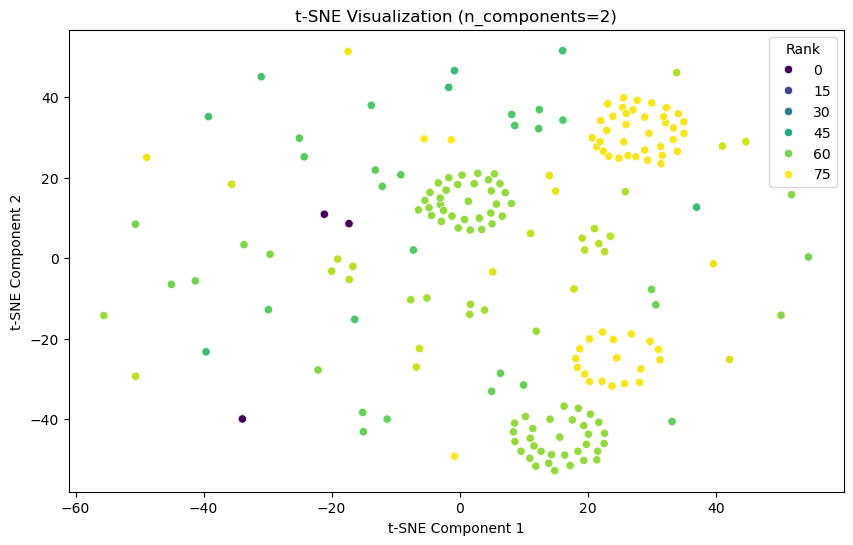

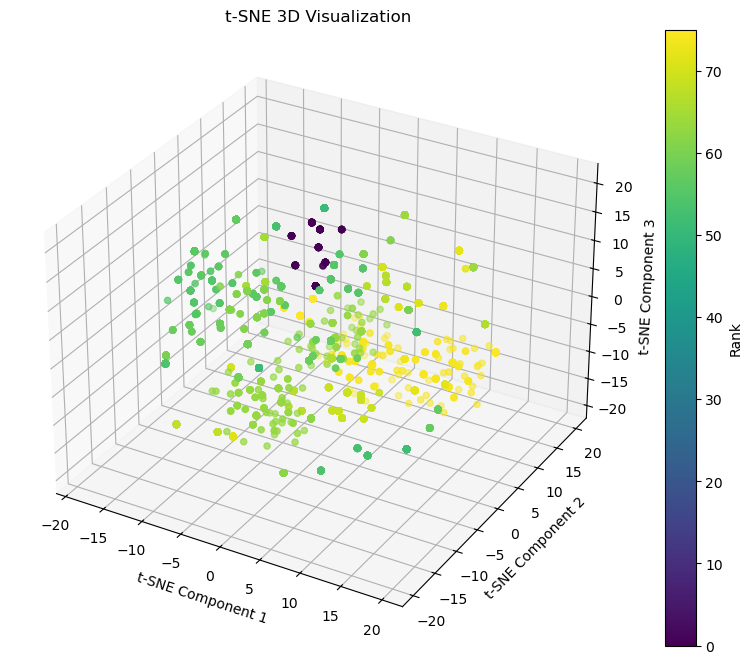

In [32]:
# Experiment with different n_components (but the hue is the Rank here)

for n_components in [2, 3]: # it should be less than 4, otherwise ValueError: 'n_components' should be inferior to 4 for the barnes_hut algorithm as it relies on quad-tree or oct-tree.
    tsne = TSNE(
        n_components=n_components,
        perplexity=best_params['perplexity'],
        learning_rate=best_params['learning_rate'],
        n_iter=best_params['n_iter'],
        init='random',
        random_state=42
    )
    
    X_tsne = tsne.fit_transform(X)
    
    # For 2D Plot
    if n_components == 2:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=data['Rank'], palette='viridis')  # Change to 'Rank' or any other variable
        plt.title(f't-SNE Visualization (n_components={n_components})')
        plt.xlabel('t-SNE Component 1')
        plt.ylabel('t-SNE Component 2')
        plt.legend(title='Rank')  # If you change hue, update legend title here
        plt.show()

    # For 3D Plot
    elif n_components == 3:
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=data['Rank'], cmap='viridis')  
        ax.set_title('t-SNE 3D Visualization')
        ax.set_xlabel('t-SNE Component 1')
        ax.set_ylabel('t-SNE Component 2')
        ax.set_zlabel('t-SNE Component 3')
        plt.colorbar(scatter, label='Rank')  
        plt.show()